# Problem set 4: APIs, SQL, and supervised machine learning

**Total points (without extra credit)**: 48 


## Resources from class

### APIs
- [Lecture slides](https://docs.google.com/presentation/d/1eblPOhpOL1HDFk3XOh3KvcrFceJ4pwZNUU_fvU8i7uo/edit#slide=id.p)
- [Activity solutions](https://github.com/herbertfreeze/QSS_Public/blob/main/activities/solutions/06_apis_solutions.ipynb)


### Supervised ML
- [Lecture slides 1](https://docs.google.com/presentation/d/1V6X9aYkYLvyh3Ea0ZSn3qkttqKz7OOPkfvbqYybMi5Q/edit#slide=id.p)
- [Lecture slides 2](https://docs.google.com/presentation/d/13xJTI_GZ2HZYI9OSmezwLUXXFxIrjwHXKz50QUjBF0w/edit)
- [Intro activity solutions](https://github.com/herbertfreeze/QSS_Public/blob/main/activities/solutions/08_ML_intro_activity_solutions.ipynb)
- [Part II activity solutions](https://github.com/herbertfreeze/QSS_Public/blob/main/activities/solutions/08_ML_optimization_activity_solutions.ipynb)
- [DataCamp course](https://app.datacamp.com/learn/courses/supervised-learning-with-scikit-learn)

### SQL
- [Lecture slides](https://docs.google.com/presentation/d/1HHgrkFtuhGIaPNMd1EOiM-8VtgnF0cwjMcmah8oWmWA/edit?usp=sharing)
- [Example code](https://github.com/herbertfreeze/QSS_Public/blob/main/activities/solutions/09_SQL_examplecode.ipynb)
- [Activity solutions](https://github.com/herbertfreeze/QSS_Public/blob/main/activities/solutions/09_SQL_activity_solutions.ipynb)
- [DataCamp course](https://app.datacamp.com/learn/courses/introduction-to-sql)

# Prep work: change SQL dataset

- Place it in [the same credentials yaml file on GitHub that contains the SQL database access information](https://github.com/herbertfreeze/QSS_public/blob/main/activities/09_db_cred.yaml) (password, host, etc.) 
    - Name the combined credentials file something appropriate (feel free to get creative)
    - Change the database name from `sentencing` to `math_gencompare`

## 0.0 Import packages

**Note you need to install some of the packages imported below (see the comments).**

In [3]:
## helpful packages
import pandas as pd
import numpy as np
import random
import re
import string
import requests
import plotnine 
from plotnine import *
import seaborn as sns
import matplotlib.pyplot as plt
import yaml
#import warnings
#warnings.filterwarnings("ignore")

## note: you may need to install these using !pip install
# !pip install census
# !pip install us
import census
from census import Census
import us
from us import states
import mysql.connector

## sklearn imports
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

## print mult things
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


def load_creds(path: str):
    with open(path, 'r') as stream:
        try:
            creds = yaml.safe_load(stream)
        except yaml.YAMLError as exc:
            print(exc)
    return(creds)

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', None)



# 1. Write a wrapper function to pull data from the NAEP API (12 points)

In the class activity on APIs (see link above), we practiced pulling from the API for the National Assessment of Educational Progress (NAEP), "America's report card" of test scores. We pulled a small amount of data at the national level (writing scores by gender) using a query where the parameters were hardcoded.
    
In this problem, we'll practice pulling a larger set of data and writing a wrapper function.
    
As a reminder, the documentation is here: https://www.nationsreportcard.gov/api_documentation.aspx

The base link is: https://www.nationsreportcard.gov/Dataservice/GetAdhocData.aspx

## 1.1 Write a query to pull 8th-grade mathematics scores in 2015 from the state of California (CA) by gender (1 point)

- Subject: mathematics 
- Subscale: MRPCM composite scale 
- Grade: 8
- Year: 2015
- grouping variable: GENDER 
- Jurisdiction: CA 
- stattype = MN (for mean)

Print the output in dataframe format and briefly interpret; what do scores look like between the genders?

In [4]:
# your code here
q1_1=('https://www.nationsreportcard.gov/'
'Dataservice/GetAdhocData.aspx?'
'type=data&subject=mathematics&grade=8&'
'subscale=MRPCM&variable=GENDER&jurisdiction=CA&stattype=MN:MN&Year=2015')

q1_1_r = requests.get(q1_1)

q1_1_j = q1_1_r.json()

q1_1_pd = pd.DataFrame(q1_1_j['result'])

q1_1_pd

## Interpretation:
# At Grade 8, gender difference in math scores is minimal, 
# with the Male students scoring 275.020977 and female students scoring 275.638637.
# In fact, contrary to popular beliefs, female students have a higher mean score. 

,year,sample,yearSampleLabel,Cohort,CohortLabel,stattype,subject,grade,scale,jurisdiction,jurisLabel,variable,variableLabel,varValue,varValueLabel,value,isStatDisplayable,errorFlag
0,2015,R3,2015,2,Grade 8,MN:MN,MAT,8,MRPCM,CA,California,GENDER,Gender,1,Male,275.020977,1,0
1,2015,R3,2015,2,Grade 8,MN:MN,MAT,8,MRPCM,CA,California,GENDER,Gender,2,Female,275.638637,1,0


## 1.2 Write a query to pull 8th-grade mathematics scores in 2013, 2015, 2017, and 2019 from California by gender (1 point)

Same as 1.1 but pull the years 2013, 2015, 2017, and 2019 (search documentation for how to combine) in one query

In [5]:
# your code here
# your code here
q1_2=('https://www.nationsreportcard.gov/'
'Dataservice/GetAdhocData.aspx?'
'type=data&subject=mathematics&grade=8&'
'subscale=MRPCM&variable=GENDER&jurisdiction=CA&stattype=MN:MN&Year=2013,2015,2017,2019')

q1_2_r = requests.get(q1_2)

q1_2_j = q1_2_r.json()

q1_2_pd = pd.DataFrame(q1_2_j['result'])

q1_2_pd

,year,sample,yearSampleLabel,Cohort,CohortLabel,stattype,subject,grade,scale,jurisdiction,jurisLabel,variable,variableLabel,varValue,varValueLabel,value,isStatDisplayable,errorFlag
0,2013,R3,2013,2,Grade 8,MN:MN,MAT,8,MRPCM,CA,California,GENDER,Gender,1,Male,277.167171,1,0
1,2013,R3,2013,2,Grade 8,MN:MN,MAT,8,MRPCM,CA,California,GENDER,Gender,2,Female,274.597824,1,0
2,2015,R3,2015,2,Grade 8,MN:MN,MAT,8,MRPCM,CA,California,GENDER,Gender,1,Male,275.020977,1,0
3,2015,R3,2015,2,Grade 8,MN:MN,MAT,8,MRPCM,CA,California,GENDER,Gender,2,Female,275.638637,1,0
4,2017,R3,2017,2,Grade 8,MN:MN,MAT,8,MRPCM,CA,California,GENDER,Gender,1,Male,276.608704,1,0
5,2017,R3,2017,2,Grade 8,MN:MN,MAT,8,MRPCM,CA,California,GENDER,Gender,2,Female,276.669430,1,0
6,2019,R3,2019,2,Grade 8,MN:MN,MAT,8,MRPCM,CA,California,GENDER,Gender,1,Male,274.511628,1,0
7,2019,R3,2019,2,Grade 8,MN:MN,MAT,8,MRPCM,CA,California,GENDER,Gender,2,Female,276.721824,1,0


## 1.3 Create a line plot to show variation in the scores across years (2 points)

Using the results from 1.2, create a plot where the x axis has the year and the y axis is the math scores (`value` in dataframe), and there are separate lines/colors for male versus female students (`varValueLabel` in dataframe)

Start the limits of the y axis minimum at 272 and add informative labels. Be sure your x-axis is ticked on odd years, because NAEP scores skip even years. 

(272.0, 277.29994776969266)

([<matplotlib.axis.XTick at 0x16e42d970>,
 [Text(2013, 0, '2013'),
  Text(2015, 0, '2015'),
  Text(2017, 0, '2017'),
  Text(2019, 0, '2019')])

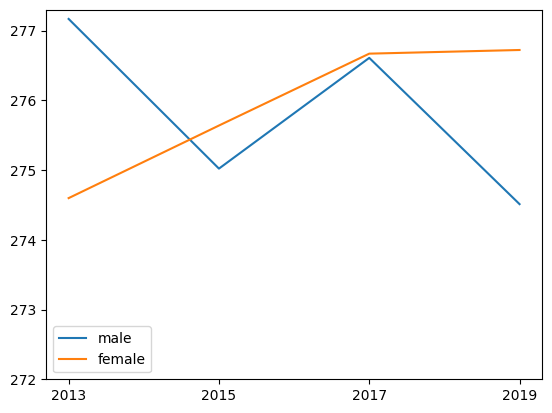

In [6]:
# your code here
male_pd = q1_2_pd[q1_2_pd["varValueLabel"]=="Male"]
female_pd = q1_2_pd[q1_2_pd["varValueLabel"]=="Female"]
plt.plot(q1_2_pd.year.unique(), male_pd.value, label = "male")
plt.plot(q1_2_pd.year.unique(), female_pd.value, label = "female")
plt.ylim(bottom=272)
plt.xticks(q1_2_pd.year.unique())
plt.legend()
plt.show()

## 1.4 Reproduce the queries from 1.1 and 1.2 using a user-defined function (4 points)

Create a function, `construct_naep_query` that takes in two arguments:

- year: this should be a list with all years (so if one year, single element list; if multiple years, list with those years)
- place: this should be a string with the name of the state or jurisdiction to pull 
    
Have the function return the query and make sure it's identical to the queries you wrote for 1.1 and 1.2 (can use assert or other checker)

In [70]:
# your code here to define function
def construct_naep_query(year:list, place):
    baseurl='https://www.nationsreportcard.gov/Dataservice/GetAdhocData.aspx?'
    part2='type=data&subject=mathematics&grade=8&'
    part3='subscale=MRPCM&variable=GENDER&jurisdiction='+str(place)
    part4='&stattype=MN:MN&Year='+",".join(year)

    query=baseurl+part2+part3+part4
    return query


In [71]:
# your code here to execute function
query_test=construct_naep_query(['2013','2015','2017','2019'],"CA")
assert query_test==q1_2, "query produced by the function doesn't match with the previous query"

## 1.5 Write and execute user-defined function that takes in a query and returns a pandas dataframe with the content of the response (4 points)

- Write a user-defined function (`process_naep_query`) that takes in the CA-specific NAEP query as a string, calls the API, and transforms the response into a pandas dataframe. Have the function return that pandas dataframe

- Make sure the function is flexible enough to handle queries that return an error; for queries that return an error, have the function return the string "Data not found; check your query" (see [API part 1 solutions code](https://github.com/herbertfreeze/QSS_public/blob/main/activities/solutions/06_apis_solutions.ipynb) for an example of `try:`/`except:`)

- Execute the function on the query that pulls 2013-2019 data (either from handwriting the query or the result in 1.4)

- Print the resulting dataframe

- Then execute the function on a query that pulls a state that doesn't exist (call this state ZZ)

In [9]:
# your code here
def process_naep_query(str_query):
    query_r=requests.get(str_query)
    try:     
        query_pd=pd.DataFrame(query_r.json()['result'])
        return query_pd
    except Exception as e:
        print("Data not found; check your query")
        print(e)
    
process_naep_query(query_test)

# Testing with non-existent state
query_error=construct_naep_query(['2013','2015','2017','2019'],"ZZ")
process_naep_query(query_error)

,year,sample,yearSampleLabel,Cohort,CohortLabel,stattype,subject,grade,scale,jurisdiction,jurisLabel,variable,variableLabel,varValue,varValueLabel,value,isStatDisplayable,errorFlag
0,2013,R3,2013,2,Grade 8,MN:MN,MAT,8,MRPCM,CA,California,GENDER,Gender,1,Male,277.167171,1,0
1,2013,R3,2013,2,Grade 8,MN:MN,MAT,8,MRPCM,CA,California,GENDER,Gender,2,Female,274.597824,1,0
2,2015,R3,2015,2,Grade 8,MN:MN,MAT,8,MRPCM,CA,California,GENDER,Gender,1,Male,275.020977,1,0
3,2015,R3,2015,2,Grade 8,MN:MN,MAT,8,MRPCM,CA,California,GENDER,Gender,2,Female,275.638637,1,0
4,2017,R3,2017,2,Grade 8,MN:MN,MAT,8,MRPCM,CA,California,GENDER,Gender,1,Male,276.608704,1,0
5,2017,R3,2017,2,Grade 8,MN:MN,MAT,8,MRPCM,CA,California,GENDER,Gender,2,Female,276.669430,1,0
6,2019,R3,2019,2,Grade 8,MN:MN,MAT,8,MRPCM,CA,California,GENDER,Gender,1,Male,274.511628,1,0
7,2019,R3,2019,2,Grade 8,MN:MN,MAT,8,MRPCM,CA,California,GENDER,Gender,2,Female,276.721824,1,0


Data not found; check your query
Invalid control character '\r' at: line 1 column 132 (char 131)


# 2. Explore data using SQL queries (18 points)

In the previous example, you worked with the data in a flat file and manipulated it using pandas. Here, we're going to practice running queries to do some calculations using SQL --- in the case of our data, this is a bit overkill since the data are small but it is practice for larger datasets.

## 2.1 Load database credentials and establish a connection (1 point)

Load a credentials file that contains the credentials you'll need for this and the next problem:

- The credentials for our class database
- The credentials for the Census API (see instructions above)

Note: to establish the SQL connection, you need to be on `eduroam` (near campus) or the Dartmouth's GlobalProtect `VPN`  ([installation instructions here](https://services.dartmouth.edu/TDClient/1806/Portal/KB/ArticleDet?ID=72395))

In [10]:
creds = load_creds("combined_cred.yaml")

In [11]:
creds

{'practice_database': {'user': 'qss20',
  'password': 'xtPdDZHnxKMFSD5RyP',
  'port': 3306,
  'database': 'sentencing',
  'host': 'qss20-7570-db.c.dartmouth.edu'},
 'pset_database': {'user': 'qss20',
  'password': 'xtPdDZHnxKMFSD5RyP',
  'port': 3306,
  'database': 'math_gencompare',
  'host': 'qss20-7570-db.c.dartmouth.edu'}}

In [12]:
## connect to database: sentencing
cnx_sentencing = mysql.connector.connect(
    user=creds['practice_database']['user'], 
    password=creds['practice_database']['password'],
    port=creds['practice_database']['port'],
    database= "sentencing",
    host = creds['practice_database']['host'])
cursor_sentencing = cnx_sentencing.cursor(buffered=True)
cnx_sentencing

In [13]:
## connect to database: math
cnx_math = mysql.connector.connect(
    user=creds['pset_database']['user'], 
    password=creds['pset_database']['password'],
    port=creds['pset_database']['port'],
    database= "math_gencompare",
    host = creds['pset_database']['host'])
cursor_math = cnx_math.cursor(buffered=True)
cnx_math

## 2.2 Run a query to select all columns and the first 5 rows of the math_gencompare database to explore structure (2 points)

Read the results in as a pandas dataframe and print the result

In [14]:
# your code here
q_5_rows = """
SELECT 
    *
FROM math_gencompare
LIMIT 5
"""
pd.read_sql_query(q_5_rows, cnx_math)
# print(pd.read_sql_query(q_5_rows, cnx_math))

/var/folders/pt/7w22wgm54fl6spvp9rcq3frh0000gq/T/ipykernel_71499/3042849455.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.


,abbrev,FIPS,state,year,female,male
0,AK,2,Alaska,2013,281.388243030547,281.723376175464
1,AL,1,Alabama,2013,268.920111754346,269.457455785562
2,AR,5,Arkansas,2013,278.381788404903,277.457662328569
3,AZ,4,Arizona,2013,279.249581150207,280.174388600923
4,CA,6,California,2013,274.597823860242,277.167170641967


## 2.3 Find the (1) number of rows in the database, (2) number of distinct states,  (3) number of distinct years (3 points)

Interpret the results - how do you think the data is structured in terms of states and years (eg long format where each state repeated; wide format)?

**Hint**: rather than using count `(*)` for the latter two, think about the `distinct` command in combination with `count`: https://www.w3resource.com/mysql/aggregate-functions-and-grouping/aggregate-functions-and-grouping-count-with-distinct.php

In [15]:
# your code here
## 1. number of rows
q_nrow = """
SELECT 
    COUNT(*)
FROM math_gencompare
"""
pd.read_sql_query(q_nrow, cnx_math)

/var/folders/pt/7w22wgm54fl6spvp9rcq3frh0000gq/T/ipykernel_71499/2496760008.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.


,COUNT(*)
0,200


In [16]:
## 2. number of distinct states
q_distinct_state = """
SELECT 
    COUNT(DISTINCT(state))
FROM math_gencompare
"""
pd.read_sql_query(q_distinct_state, cnx_math)

/var/folders/pt/7w22wgm54fl6spvp9rcq3frh0000gq/T/ipykernel_71499/2473451017.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.


,COUNT(DISTINCT(state))
0,50


In [17]:
## 3. number of distinct years
q_distinct_year = """
SELECT 
    COUNT(DISTINCT(year))
FROM math_gencompare
"""
pd.read_sql_query(q_distinct_year, cnx_math)

/var/folders/pt/7w22wgm54fl6spvp9rcq3frh0000gq/T/ipykernel_71499/1404301069.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.


,COUNT(DISTINCT(year))
0,4


In [18]:
### interpretation:
# I think the data is structured in a long format where each state is repeated for every year.

## 2.4 Construct a new variable, `is_male_higher` that takes the value of 1 if the math scores of males exceed that of females in that state and year (each row) (2 points)

Read in the results, print the head, and find the mean across all rows (the percentage of state-years where male students have higher scores)

In [19]:
# your code here
q_create_var = """
SELECT 
    *,
    CASE 
        WHEN male>female THEN 1
        ELSE 0
    END AS is_male_higher
FROM math_gencompare
"""

math = pd.read_sql_query(q_create_var, cnx_math)

/var/folders/pt/7w22wgm54fl6spvp9rcq3frh0000gq/T/ipykernel_71499/3163327558.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.


In [20]:
# python way to show head
math.head()

# SQL way to show head
q_head = """
SELECT 
    *,
    CASE 
        WHEN male>female THEN 1
        ELSE 0
    END AS is_male_higher
FROM math_gencompare
LIMIT 5
"""
pd.read_sql_query(q_head, cnx_math)

,abbrev,FIPS,state,year,female,male,is_male_higher
0,AK,2,Alaska,2013,281.388243030547,281.723376175464,1
1,AL,1,Alabama,2013,268.920111754346,269.457455785562,1
2,AR,5,Arkansas,2013,278.381788404903,277.457662328569,0
3,AZ,4,Arizona,2013,279.249581150207,280.174388600923,1
4,CA,6,California,2013,274.597823860242,277.167170641967,1


/var/folders/pt/7w22wgm54fl6spvp9rcq3frh0000gq/T/ipykernel_71499/4209339636.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.


,abbrev,FIPS,state,year,female,male,is_male_higher
0,AK,2,Alaska,2013,281.388243030547,281.723376175464,1
1,AL,1,Alabama,2013,268.920111754346,269.457455785562,1
2,AR,5,Arkansas,2013,278.381788404903,277.457662328569,0
3,AZ,4,Arizona,2013,279.249581150207,280.174388600923,1
4,CA,6,California,2013,274.597823860242,277.167170641967,1


In [21]:
# python way to find mean
math.is_male_higher.mean()

# SQL way to find mean
q_male_prop = """
SELECT 
    avg(is_male_higher) AS prop_male_higher
FROM  (
    SELECT 
        *,
        CASE 
            WHEN male>female THEN 1
            ELSE 0
        END AS is_male_higher
    FROM math_gencompare) AS temp
"""
pd.read_sql_query(q_male_prop, cnx_math)

0.515

/var/folders/pt/7w22wgm54fl6spvp9rcq3frh0000gq/T/ipykernel_71499/3229459463.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.


,prop_male_higher
0,0.515


## 2.5 group by year and find the percentage of states where male scores are higher than females (4 points)

**A.** Write a query that (1) groups by year and (2) finds the percentage of states that have higher scores for males than females in this year 

**B.** Print the resulting dataframe and interpret the results 

**Hint:** To compare male and female scores, consider logical operators (e.g., `<`, `>`, `=`) and simple aggregation (e.g., `avg()` to get mean) or using a subquery to construct the indicator.

In [22]:
# your code here
q_prop_byyear = """
WITH s1 AS (
    SELECT 
        *,
        CASE 
            WHEN male>female THEN 1
            ELSE 0
        END AS is_male_higher
    FROM math_gencompare)
SELECT 
    year,
    avg(is_male_higher) AS prop_male_higher
FROM s1
GROUP BY year
"""

pd.read_sql_query(q_prop_byyear, cnx_math)

### interpretation: 
# From 2013 to 2019, the percentage of states where male math scores were higher was in general decreasing, 
# dropping from 62% to 30%, with the exception of 2017. 
# This suggests that over time, the gap in math performance between male and female students decreased, 
# and female even performed better than male in 2019.

/var/folders/pt/7w22wgm54fl6spvp9rcq3frh0000gq/T/ipykernel_71499/790478275.py:18: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.


,year,prop_male_higher
0,2013,0.62
1,2015,0.56
2,2017,0.58
3,2019,0.30


## 2.6 group by state and find the percentage of years where male scores higher than females

**A.** Write a query that (1) groups by state and (2) finds the percentage of years that have higher scores for males than females in that state

**B.** Plot the results ordering the states from males higher all 4 years to males higher none of the years

In [23]:
# your code here
q_prop_bystate = """
WITH s1 AS (
    SELECT 
        *,
        CASE 
            WHEN male>female THEN 1
            ELSE 0
        END AS is_male_higher
    FROM math_gencompare)
SELECT 
    state,
    avg(is_male_higher) AS prop_male_higher
FROM s1
GROUP BY state
"""

prop_bystate = pd.read_sql_query(q_prop_bystate, cnx_math)
prop_bystate

/var/folders/pt/7w22wgm54fl6spvp9rcq3frh0000gq/T/ipykernel_71499/4139622273.py:18: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.


,state,prop_male_higher
0,Alaska,0.75
1,Alabama,0.50
2,Arkansas,0.50
3,Arizona,0.75
4,California,0.25
5,Colorado,0.75
6,Connecticut,0.50
7,Delaware,0.50
8,Florida,0.75
9,Georgia,0.75


<Figure size 1200x600 with 0 Axes>

<BarContainer object of 50 artists>

Text(0.5, 0, 'State')

Text(0, 0.5, 'Percentage of Years Males Had Higher Scores')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49],
 [Text(0, 0, 'Illinois'),
  Text(1, 0, 'Idaho'),
  Text(2, 0, 'Utah'),
  Text(3, 0, 'New Hampshire'),
  Text(4, 0, 'New Jersey'),
  Text(5, 0, 'New Mexico'),
  Text(6, 0, 'Nevada'),
  Text(7, 0, 'Maine'),
  Text(8, 0, 'Kansas'),
  Text(9, 0, 'Indiana'),
  Text(10, 0, 'Alaska'),
  Text(11, 0, 'Georgia'),
  Text(12, 0, 'Florida'),
  Text(13, 0, 'Colorado'),
  Text(14, 0, 'Washington'),
  Text(15, 0, 'Arizona'),
  Text(16, 0, 'West Virginia'),
  Text(17, 0, 'Rhode Island'),
  Text(18, 0, 'Tennessee'),
  Text(19, 0, 'North Dakota'),
  Text(20, 0, 'Oregon'),
  Text(21, 0, 'Oklahoma'),
  Text(22, 0, 'Ohio'),
  Text(23, 0, 'New York'),
  Text(24, 0, 'Texas'),
  Text(25, 0, 'Nebraska'),
  Text(26, 0, 'Wyomin

([<matplotlib.axis.YTick at 0x16e62ac70>,
 [Text(0, 0.0, '0.00'),
  Text(0, 0.25, '0.25'),
  Text(0, 0.5, '0.50'),
  Text(0, 0.75, '0.75'),
  Text(0, 1.0, '1.00')])

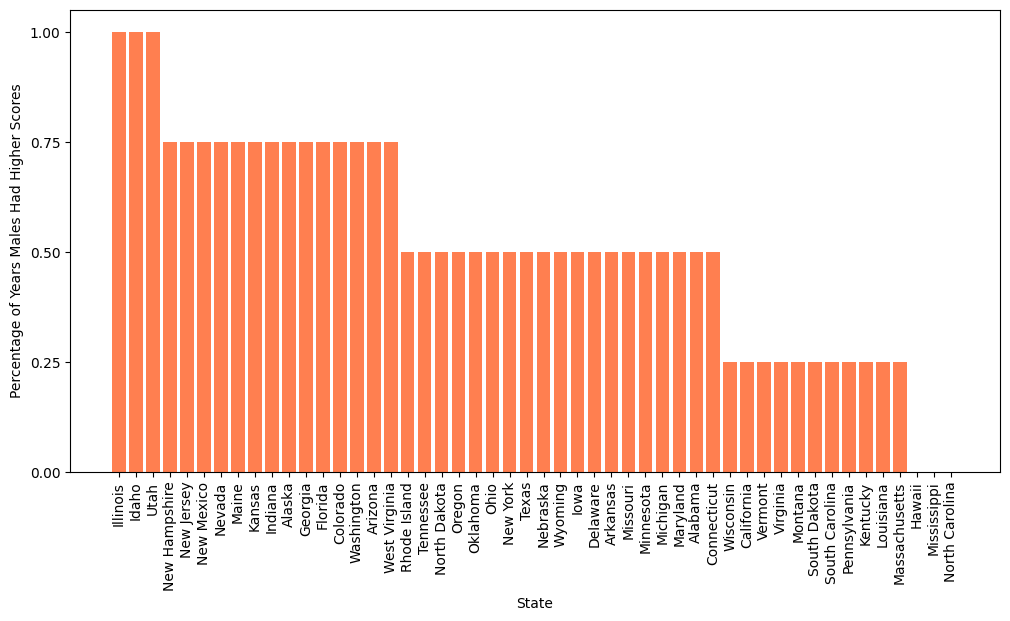

In [24]:
## plotting
df = prop_bystate.sort_values(by = 'prop_male_higher', ascending = False)

plt.figure(figsize=(12, 6))
plt.bar(df['state'], df['prop_male_higher'], color = 'coral')
plt.xlabel('State')
plt.ylabel('Percentage of Years Males Had Higher Scores')
plt.xticks(rotation = 90)
plt.yticks([0, 0.25, 0.5, 0.75, 1])
plt.show()

## 2.7 Use a subquery to create an indicator and group by that indicator (6 points)

The following states were the first 6 to expand the right to vote to women before the uniform federal expansion in 1920

- Wyoming 1890
- Colorado 1893
- Utah 1896
- Idaho 1896
- Washington 1910
- California 1911

**A.** Create an indicator `is_early_voter` for whether a state is in that list or not; do so without typing the state names inside the string and instead collapsing the list of states we provide and using something like `format`. Hint on how to combine the state names while preserving the quotes around each: https://stackoverflow.com/questions/12007686/join-a-list-of-strings-in-python-and-wrap-each-string-in-quotation-marks 

**B.** Then, group by the `is_early_voter` indicator and `year` and find the percencentage of states in each group where males had higher scores than females 

**C.** Print the resulting dataframe and interpret. Does early expansion of voting seem to be correlated with girls scoring better on the math tests a century later?

**Hint:** in order to group by the indicator in step b, you may need to use a subquery 

In [25]:
## list of states we provide
list_suffrage = ["Wyoming", "Colorado", "Utah", "Idaho", "Washington", 
                "California"]


In [26]:
print(', '.join(f'"{state}"' for state in list_suffrage)) # test

"Wyoming", "Colorado", "Utah", "Idaho", "Washington", "California"


In [27]:
## your code here
q_early_voter = f"""
WITH s1 AS (
    SELECT 
        *,
        CASE 
            WHEN state IN ({', '.join(f'"{state}"' for state in list_suffrage)}) THEN "YES"
            ELSE "NO"
        END AS is_early_voter,
        CASE 
            WHEN male>female THEN 1
            ELSE 0
        END AS is_male_higher
    FROM math_gencompare)
SELECT 
    is_early_voter,
    year,
    avg(is_male_higher) AS prop_male_higher
FROM s1
GROUP BY is_early_voter, year
"""

pd.read_sql_query(q_early_voter, cnx_math)

## Interpretation:
# Early expansion of voting does not seem to be correlated with girls scoring better on math tests a century later, 
# as states with early voting rights show higher percentages of states where male scores were higher.

/var/folders/pt/7w22wgm54fl6spvp9rcq3frh0000gq/T/ipykernel_71499/1322102947.py:23: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.


,is_early_voter,year,prop_male_higher
0,NO,2013,0.5909
1,YES,2013,0.8333
2,NO,2015,0.5455
3,YES,2015,0.6667
4,NO,2017,0.5455
5,YES,2017,0.8333
6,NO,2019,0.2727
7,YES,2019,0.5000


# 3. Explore variation in math score disparities and trends (18 points)

## 3.0 Read in the `acs_wmath.pkl` file (csv is backup) (0 points)

In [31]:
## your code here
df = pd.read_pickle("acs_wmath.pkl")
df.shape

(50, 92)

## 3.1 Create a visualization where one axis is the state; the other axis is the male 2013 math scores - the female 2013 math scores (gender disparity) (2 points)


You have free rein over additional details but make sure it is informative over what direction of disparity positive versus negative values mean


<Figure size 1600x600 with 0 Axes>

<BarContainer object of 50 artists>

Text(0.5, 1.0, 'Gender Disparity in 2013 Math Scores by State')

Text(0.5, 0, 'State')

Text(0, 0.5, 'Math Score Disparity (Male - Female)')

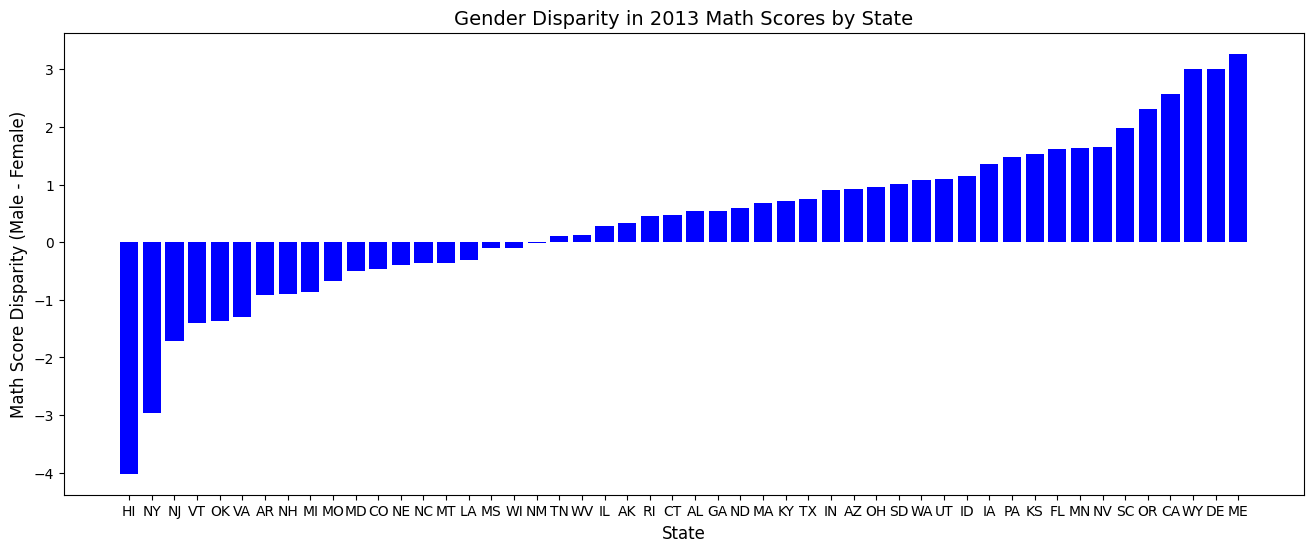

In [32]:
## your code here
df['gender disparity'] = df['math_male_2013'] - df['math_female_2013']
df = df.sort_values(by='gender disparity')
plt.figure(figsize=(16, 6))
plt.bar(df['abbrev'], df['gender disparity'], color='blue')

# Add titles and labels
plt.title("Gender Disparity in 2013 Math Scores by State", fontsize=14)
plt.xlabel("State", fontsize=12)
plt.ylabel("Math Score Disparity (Male - Female)", fontsize=12)

## 3.2 Examine gender disparity in relation to household income (6 points)

**A.** Construct an indicator variable for the state having better performance of males in 2013 than females

**B.** First plot a scatterplot (or seaborn regplot) of estimated median household income from the acs data (we provide varname below) vs `math_male_2013`. Then do a second smoothed scatterplot for median household income vs `math_female_2013`.

**C.** 
Then use the `np.corrcoef` command (three separate times) to examine the bivariate correlation of
- male performance
- female performance
- the indicator variable from **A** 

with median household income (`acspredict_median_household_income_in_the_past_12_months__in_2018_inflation-adjusted_dollars_estimatemedian household income in the past 12 months in 2018 inflationadjusted dollars`)

Documentation: https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html

**D.** Interpret the correlations - in states with higher median household income (MHI), do 
   - boys tend to perform better than boys in states with lower MHI?
   - girls tend to perform better than girls in states with lower MHI?
   - boys tend to outperform girls more than they do in states with lower MHI?

In [33]:
# your code here
# A. Construct an indicator variable for the state having better performance of males in 2013 than females
df['better_male_2013'] = df['math_male_2013'] > df['math_female_2013']
df.head()

,math_female_2013,math_female_2015,math_female_2017,math_female_2019,math_male_2013,math_male_2015,math_male_2017,math_male_2019,abbrev,FIPS,acspredict_allocation_of_household_income_in_the_past_12_months_-_percent_of_income_allocatedestimatepercent of income allocated 10 to less than 25 percent of total income for household allocated,acspredict_allocation_of_household_income_in_the_past_12_months_-_percent_of_income_allocatedestimatepercent of income allocated 100 percent of total income for household allocated,acspredict_allocation_of_household_income_in_the_past_12_months_-_percent_of_income_allocatedestimatepercent of income allocated 25 to less than 50 percent of total income for household allocated,acspredict_allocation_of_household_income_in_the_past_12_months_-_percent_of_income_allocatedestimatepercent of income allocated 50 to less than 100 percent of total income for household allocated,acspredict_allocation_of_household_income_in_the_past_12_months_-_percent_of_income_allocatedestimatepercent of income allocated dollar value of zero allocated,acspredict_allocation_of_household_income_in_the_past_12_months_-_percent_of_income_allocatedestimatepercent of income allocated more than 0 to less than 10 percent of total income for household allocated,acspredict_allocation_of_household_income_in_the_past_12_months_-_percent_of_income_allocatedestimatepercent of income allocated no income allocated,acspredict_educational_attainment_for_the_population_25_years_and_overestimatetotal10th grade,acspredict_educational_attainment_for_the_population_25_years_and_overestimatetotal11th grade,acspredict_educational_attainment_for_the_population_25_years_and_overestimatetotal12th grade no diploma,acspredict_educational_attainment_for_the_population_25_years_and_overestimatetotal1st grade,acspredict_educational_attainment_for_the_population_25_years_and_overestimatetotal2nd grade,acspredict_educational_attainment_for_the_population_25_years_and_overestimatetotal3rd grade,acspredict_educational_attainment_for_the_population_25_years_and_overestimatetotal4th grade,acspredict_educational_attainment_for_the_population_25_years_and_overestimatetotal5th grade,acspredict_educational_attainment_for_the_population_25_years_and_overestimatetotal6th grade,acspredict_educational_attainment_for_the_population_25_years_and_overestimatetotal7th grade,acspredict_educational_attainment_for_the_population_25_years_and_overestimatetotal8th grade,acspredict_educational_attainment_for_the_population_25_years_and_overestimatetotal9th grade,acspredict_educational_attainment_for_the_population_25_years_and_overestimatetotalassociate's degree,acspredict_educational_attainment_for_the_population_25_years_and_overestimatetotalbachelor's degree,acspredict_educational_attainment_for_the_population_25_years_and_overestimatetotaldoctorate degree,acspredict_educational_attainment_for_the_population_25_years_and_overestimatetotalged or alternative credential,acspredict_educational_attainment_for_the_population_25_years_and_overestimatetotalkindergarten,acspredict_educational_attainment_for_the_population_25_years_and_overestimatetotalmaster's degree,acspredict_educational_attainment_for_the_population_25_years_and_overestimatetotalno schooling completed,acspredict_educational_attainment_for_the_population_25_years_and_overestimatetotalnursery school,acspredict_educational_attainment_for_the_population_25_years_and_overestimatetotalprofessional school degree,acspredict_educational_attainment_for_the_population_25_years_and_overestimatetotalregular high school diploma,acspredict_educational_attainment_for_the_population_25_years_and_overestimatetotalsome college 1 or more years no degree,acspredict_educational_attainment_for_the_population_25_years_and_overestimatetotalsome college less than 1 year,acspredict_household_type__including_living_alone__by_relationshipestimatetotalin group quarters,acspredict_household_type__including_living_alone__by_relationshipestimatetot

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='acspredict_median_household_income_in_the_past_12_months__in_2018_inflation-adjusted_dollars_estimatemedian household income in the past 12 months in 2018 inflationadjusted dollars', ylabel='math_male_2013'>

Text(0.5, 1.0, 'Median Household Income vs Math Male 2013 Performance')

Text(0.5, 0, 'Median Household Income (2018 Inflation-Adjusted)')

Text(0, 0.5, 'Math Male 2013 Performance')

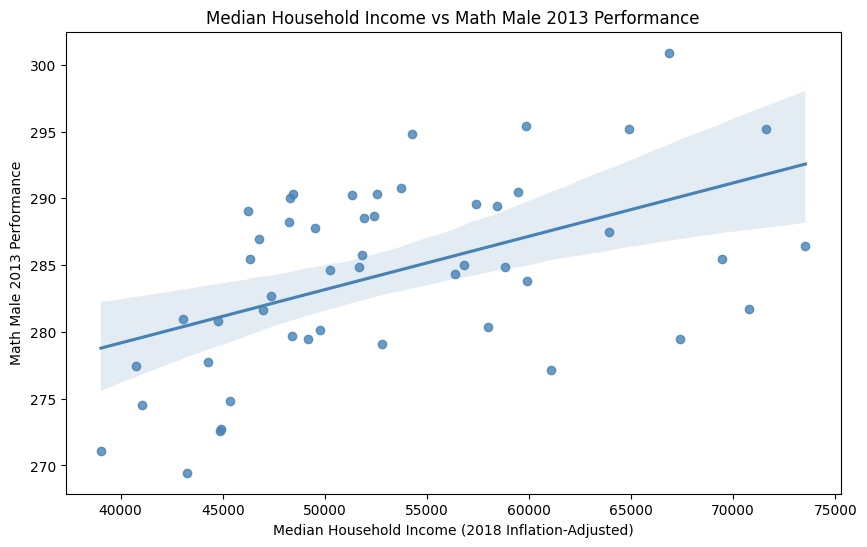

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='acspredict_median_household_income_in_the_past_12_months__in_2018_inflation-adjusted_dollars_estimatemedian household income in the past 12 months in 2018 inflationadjusted dollars', ylabel='math_female_2013'>

Text(0.5, 1.0, 'Median Household Income vs Math Female 2013 Performance')

Text(0.5, 0, 'Median Household Income (2018 Inflation-Adjusted)')

Text(0, 0.5, 'Math Female 2013 Performance')

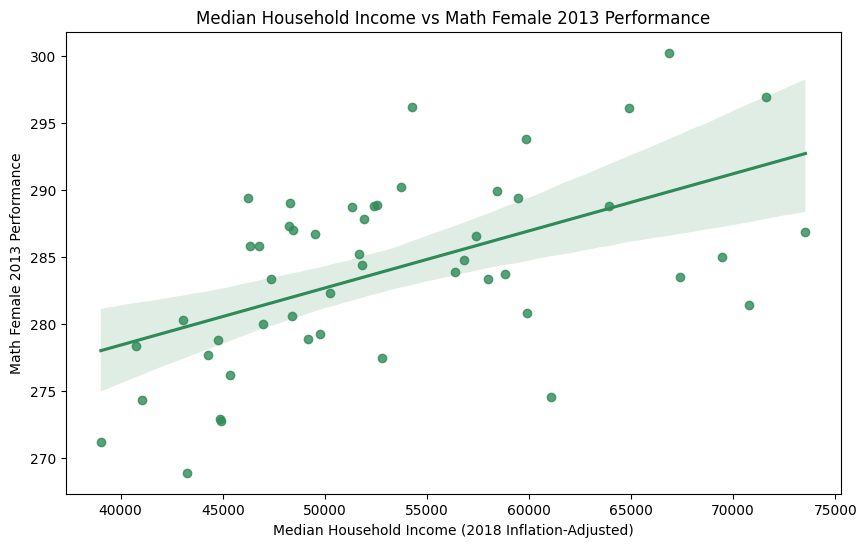

In [34]:
# B. Plot a scatterplot (or seaborn regplot) of estimated median household income from the acs data vs math_male_2013. 
median_income_var = 'acspredict_median_household_income_in_the_past_12_months__in_2018_inflation-adjusted_dollars_estimatemedian household income in the past 12 months in 2018 inflationadjusted dollars'

# Scatterplot for males
plt.figure(figsize=(10, 6))

sns.regplot(x=df[median_income_var], 
            y=df["math_male_2013"], 
            color="steelblue"
)

plt.title("Median Household Income vs Math Male 2013 Performance")
plt.xlabel("Median Household Income (2018 Inflation-Adjusted)")
plt.ylabel("Math Male 2013 Performance")
plt.show()

#Then do a second smoothed scatterplot for median household income vs math_female_2013.
plt.figure(figsize=(10, 6))
sns.regplot(x=df[median_income_var], 
            y=df["math_female_2013"], 
           color="seagreen")
plt.title("Median Household Income vs Math Female 2013 Performance")
plt.xlabel("Median Household Income (2018 Inflation-Adjusted)")
plt.ylabel("Math Female 2013 Performance")
plt.show()

In [35]:
# C. Then use the np.corrcoef command (three separate times) to examine the bivariate correlation of
# male performance, female performance, the indicator variable from A
# with median household income

corr_male = np.corrcoef(df['math_male_2013'], df[median_income_var])[0, 1]
print("male performance correlation:", corr_male)

corr_female = np.corrcoef(df['math_female_2013'], df[median_income_var])[0, 1]
print("female performance correlation:", corr_female)

corr_indicator = np.corrcoef(df['better_male_2013'], df[median_income_var])[0, 1]
print("better male correlation:", corr_indicator)

male performance correlation: 0.5073471931940416
female performance correlation: 0.5433780349589304
better male correlation: -0.03387519833365428


D. Interpret the correlations - in states with higher median household income (MHI), do
#boys tend to perform better than boys in states with lower MHI?
#girls tend to perform better than girls in states with lower MHI?

Interpretation: Both boys and girls show improved performance in states with higher MHI, so we can say that household income positively impacts educational outcomes for both boys and girls. Meanwhile, since there is a small but negative correlation between boys' outperformance and MHI, we infer that boys tend to outperform girls more in states with lower MHI, though it might be a weak inference. 

## 3.3 Predicting disparities (10 points)

**A.** Read in the raw `acs_wmath` data again (this loses the variables you created above)

**B.** Construct a binary indicator variable for male score > female score  for each year - for full credit, do so without repeating the difference code for each of the four years: name these according to following convention: `outcome_male_higher_female_year` where year is 2013, 2015, 2017, or 2019 (e.g., 2013: `outcome_male_higher_female_2013`). After this, remove the raw math scores as columns in the data (so filter out any column with the word math)

**C.** Melt the data (`acs_wmath`) to long where instead of wide years, years are repeated within state; the ACS vars will also be repeated since we only pulled one year. In other words, reshape the data from "wide format", where each state is a row and we have separate columns for each year, to "long format", where states are repeated four times: once for each year in the data (2013, 2015, 2017, 2019). With 50 states, your final shape should be (200,84).
- See: https://pandas.pydata.org/docs/reference/api/pandas.melt.html

**D.** Split into train-test split at state level (so all years in same state -> either all in train or all test). Randomize 35 states to train; 15 states in test. 

**E.** Normalize the features to mean 0, variance 1 and estimate a decision tree with a max depth of 5. Your covariates should have the term 'acspredict' in it.

- **Hint:** The ML literature recommends using the training set scaler to transform the test set, rather than using a unique scaler to initialize each one. The reasons are discussed here: https://stats.stackexchange.com/questions/495357/why-do-we-normalize-test-data-on-the-parameters-of-the-training-data

**F.** Interpret the feature importances

**G.** Evaluate the precision and recall of that model in the test set states without using the `score`, `precision`, or `recall` functions in sklearn. Briefly interpret: compared to our class example (a high-dimensional feature matrix of yelp reviews with ~15000 observations), why do you think our models perform worse for this set of data/predictors?

**Additional resources:** 

- Feature normalization: https://scikit-learn.org/stable/modules/preprocessing.html

- Definition of precision and recall: https://en.wikipedia.org/wiki/Precision_and_recall

In [37]:
# A. your code here to load data
df = pd.read_pickle("acs_wmath.pkl")
df.head()
df.shape

,math_female_2013,math_female_2015,math_female_2017,math_female_2019,math_male_2013,math_male_2015,math_male_2017,math_male_2019,abbrev,FIPS,acspredict_allocation_of_household_income_in_the_past_12_months_-_percent_of_income_allocatedestimatepercent of income allocated 10 to less than 25 percent of total income for household allocated,acspredict_allocation_of_household_income_in_the_past_12_months_-_percent_of_income_allocatedestimatepercent of income allocated 100 percent of total income for household allocated,acspredict_allocation_of_household_income_in_the_past_12_months_-_percent_of_income_allocatedestimatepercent of income allocated 25 to less than 50 percent of total income for household allocated,acspredict_allocation_of_household_income_in_the_past_12_months_-_percent_of_income_allocatedestimatepercent of income allocated 50 to less than 100 percent of total income for household allocated,acspredict_allocation_of_household_income_in_the_past_12_months_-_percent_of_income_allocatedestimatepercent of income allocated dollar value of zero allocated,acspredict_allocation_of_household_income_in_the_past_12_months_-_percent_of_income_allocatedestimatepercent of income allocated more than 0 to less than 10 percent of total income for household allocated,acspredict_allocation_of_household_income_in_the_past_12_months_-_percent_of_income_allocatedestimatepercent of income allocated no income allocated,acspredict_educational_attainment_for_the_population_25_years_and_overestimatetotal10th grade,acspredict_educational_attainment_for_the_population_25_years_and_overestimatetotal11th grade,acspredict_educational_attainment_for_the_population_25_years_and_overestimatetotal12th grade no diploma,acspredict_educational_attainment_for_the_population_25_years_and_overestimatetotal1st grade,acspredict_educational_attainment_for_the_population_25_years_and_overestimatetotal2nd grade,acspredict_educational_attainment_for_the_population_25_years_and_overestimatetotal3rd grade,acspredict_educational_attainment_for_the_population_25_years_and_overestimatetotal4th grade,acspredict_educational_attainment_for_the_population_25_years_and_overestimatetotal5th grade,acspredict_educational_attainment_for_the_population_25_years_and_overestimatetotal6th grade,acspredict_educational_attainment_for_the_population_25_years_and_overestimatetotal7th grade,acspredict_educational_attainment_for_the_population_25_years_and_overestimatetotal8th grade,acspredict_educational_attainment_for_the_population_25_years_and_overestimatetotal9th grade,acspredict_educational_attainment_for_the_population_25_years_and_overestimatetotalassociate's degree,acspredict_educational_attainment_for_the_population_25_years_and_overestimatetotalbachelor's degree,acspredict_educational_attainment_for_the_population_25_years_and_overestimatetotaldoctorate degree,acspredict_educational_attainment_for_the_population_25_years_and_overestimatetotalged or alternative credential,acspredict_educational_attainment_for_the_population_25_years_and_overestimatetotalkindergarten,acspredict_educational_attainment_for_the_population_25_years_and_overestimatetotalmaster's degree,acspredict_educational_attainment_for_the_population_25_years_and_overestimatetotalno schooling completed,acspredict_educational_attainment_for_the_population_25_years_and_overestimatetotalnursery school,acspredict_educational_attainment_for_the_population_25_years_and_overestimatetotalprofessional school degree,acspredict_educational_attainment_for_the_population_25_years_and_overestimatetotalregular high school diploma,acspredict_educational_attainment_for_the_population_25_years_and_overestimatetotalsome college 1 or more years no degree,acspredict_educational_attainment_for_the_population_25_years_and_overestimatetotalsome college less than 1 year,acspredict_household_type__including_living_alone__by_relationshipestimatetotalin group quarters,acspredict_household_type__including_living_alone__by_relationshipestimatetot

(50, 92)

In [38]:
# B. your code here to construct binary indicators for male higher
years = ["2013", "2015", "2017", "2019"]
for year in years:
    male_col = "math_male_" + year
    female_col = "math_female_" + year
    outcome_col = "outcome_male_higher_female_" + year
    df[outcome_col] = (df[male_col] > df[female_col]).astype(int)
df = df[[col for col in df.columns if "math" not in col]]
df.head()
df.shape

,abbrev,FIPS,acspredict_allocation_of_household_income_in_the_past_12_months_-_percent_of_income_allocatedestimatepercent of income allocated 10 to less than 25 percent of total income for household allocated,acspredict_allocation_of_household_income_in_the_past_12_months_-_percent_of_income_allocatedestimatepercent of income allocated 100 percent of total income for household allocated,acspredict_allocation_of_household_income_in_the_past_12_months_-_percent_of_income_allocatedestimatepercent of income allocated 25 to less than 50 percent of total income for household allocated,acspredict_allocation_of_household_income_in_the_past_12_months_-_percent_of_income_allocatedestimatepercent of income allocated 50 to less than 100 percent of total income for household allocated,acspredict_allocation_of_household_income_in_the_past_12_months_-_percent_of_income_allocatedestimatepercent of income allocated dollar value of zero allocated,acspredict_allocation_of_household_income_in_the_past_12_months_-_percent_of_income_allocatedestimatepercent of income allocated more than 0 to less than 10 percent of total income for household allocated,acspredict_allocation_of_household_income_in_the_past_12_months_-_percent_of_income_allocatedestimatepercent of income allocated no income allocated,acspredict_educational_attainment_for_the_population_25_years_and_overestimatetotal10th grade,acspredict_educational_attainment_for_the_population_25_years_and_overestimatetotal11th grade,acspredict_educational_attainment_for_the_population_25_years_and_overestimatetotal12th grade no diploma,acspredict_educational_attainment_for_the_population_25_years_and_overestimatetotal1st grade,acspredict_educational_attainment_for_the_population_25_years_and_overestimatetotal2nd grade,acspredict_educational_attainment_for_the_population_25_years_and_overestimatetotal3rd grade,acspredict_educational_attainment_for_the_population_25_years_and_overestimatetotal4th grade,acspredict_educational_attainment_for_the_population_25_years_and_overestimatetotal5th grade,acspredict_educational_attainment_for_the_population_25_years_and_overestimatetotal6th grade,acspredict_educational_attainment_for_the_population_25_years_and_overestimatetotal7th grade,acspredict_educational_attainment_for_the_population_25_years_and_overestimatetotal8th grade,acspredict_educational_attainment_for_the_population_25_years_and_overestimatetotal9th grade,acspredict_educational_attainment_for_the_population_25_years_and_overestimatetotalassociate's degree,acspredict_educational_attainment_for_the_population_25_years_and_overestimatetotalbachelor's degree,acspredict_educational_attainment_for_the_population_25_years_and_overestimatetotaldoctorate degree,acspredict_educational_attainment_for_the_population_25_years_and_overestimatetotalged or alternative credential,acspredict_educational_attainment_for_the_population_25_years_and_overestimatetotalkindergarten,acspredict_educational_attainment_for_the_population_25_years_and_overestimatetotalmaster's degree,acspredict_educational_attainment_for_the_population_25_years_and_overestimatetotalno schooling completed,acspredict_educational_attainment_for_the_population_25_years_and_overestimatetotalnursery school,acspredict_educational_attainment_for_the_population_25_years_and_overestimatetotalprofessional school degree,acspredict_educational_attainment_for_the_population_25_years_and_overestimatetotalregular high school diploma,acspredict_educational_attainment_for_the_population_25_years_and_overestimatetotalsome college 1 or more years no degree,acspredict_educational_attainment_for_the_population_25_years_and_overestimatetotalsome college less than 1 year,acspredict_household_type__including_living_alone__by_relationshipestimatetotalin group quarters,acspredict_household_type__including_living_alone__by_relationshipestimatetotalin households,acspredict_household_type__including_living_alone__by_relationshipestimatetotalin householdsin family households

(50, 88)

In [39]:
#C. Melting
columns_to_melt = [col for col in df.columns if any(year in col for year in ['2013', '2015', '2017', '2019'])]
static_columns = [col for col in df.columns if col not in columns_to_melt]

df_long = pd.melt(
    df,
    id_vars=static_columns,
    value_vars=columns_to_melt,
    var_name='variable'
)
df_long.shape

(200, 86)

In [65]:
# D. your code here for train/test split
# Define the number of states for training and testing
train_size = 35
test_size = 15
random.seed(221)
train_states = random.sample(list(set(df_long['state'])), train_size)

def my_split(train_states, df, id_col='state'):
    test_states = set(df[id_col]).difference(train_states)
    train = df[df[id_col].isin(train_states)].copy()
    test = df[df[id_col].isin(test_states)].copy()
    X_train = train[[col for col in train.columns if col != "value"]]
    y_train = train["value"]
    X_test = test[[col for col in test.columns if col != "value"]]
    y_test = test["value"]
    return X_train, y_train, X_test, y_test


In [42]:
X_train.shape
X_test.shape

(140, 85)

(60, 85)

In [66]:
# E
covariates = [col for col in df_long.columns if 'acspredict' in col]

scaler = preprocessing.StandardScaler().fit(X_train[covariates])
X_train_cov = pd.DataFrame(scaler.transform(X_train[covariates]), index=X_train.index, columns = covariates)
#X_train_scaled = X_train.copy()
#X_train_scaled[covariates] = X_train_cov
#X_train_scaled

# using the same scaler for X_test
X_test_cov = pd.DataFrame(scaler.transform(X_test[covariates]), index=X_test.index, columns = covariates)
#X_test_scaled = X_test.copy()
#X_test_scaled[covariates] = X_test_cov
#X_test_scaled

In [86]:
# estimate a decision tree with a max depth of 5
dt_classifier = DecisionTreeClassifier(criterion='gini',  # or 'entropy' for information gain
                                       splitter='best',  # or 'random' for random best split
                                       max_depth=5,  # how deep tree nodes can go
                                       min_samples_split=5,  # samples needed to split node
                                       min_samples_leaf=10,  # samples needed for a leaf
                                       min_weight_fraction_leaf=0.0,  # weight of samples needed for a node
                                       max_features=None,  # number of features to look for when splitting
                                       max_leaf_nodes=None,  # max nodes
                                       min_impurity_decrease=1e-07, #early stopping
                                       random_state = 42) #random seed
dt_classifier.fit(X_train_cov, y_train)

DecisionTreeClassifier(max_depth=5, min_impurity_decrease=1e-07,
                       min_samples_leaf=10, min_samples_split=5,
                       random_state=42)

In [87]:
# F. your code here to interpret feature importances
feature_df = pd.DataFrame([dt_classifier.feature_importances_], columns=covariates).transpose()
feature_df.sort_values(by=feature_df.columns[0], ascending=False)

# Interpretation
# There are a few features (in our case, 7) that are key to predicting whether boys outperform girls in the designated states. 
# The most important feature in our analysis is "acspredict_household_type__including_living_alone__by_relationshipestimatetotalin households," it appears that household type is a strong predictor relative to other features relevant to student performance.
# With the second most important feature being "acspredict_educational_attainment_for_the_population_25_years_and_overestimatetotalmaster's degree"
# , it suggests that higher educational attainment among adults in the household, particularly at the master's degree level, 
# may be positively correlated with boys outperforming girls in academic performance across the designated states.
# Meanwhile, features that contain "ratio_of_income_to_poverty_level_of_families" seems less relevant

,0
acspredict_household_type__including_living_alone__by_relationshipestimatetotalin households,0.435686
acspredict_educational_attainment_for_the_population_25_years_and_overestimatetotalmaster's degree,0.196966
acspredict_ratio_of_income_to_poverty_level_of_families_in_the_past_12_monthsestimatetotal200 to 299,0.136353
acspredict_household_type__including_living_alone__by_relationshipestimatetotalin householdsin nonfamily householdsnonrelativesother nonrelatives,0.127499
acspredict_allocation_of_household_income_in_the_past_12_months_-_percent_of_income_allocatedestimatepercent of income allocated 25 to less than 50 percent of total income for household allocated,0.054008
acspredict_household_type__including_living_alone__by_relationshipestimatetotalin householdsin nonfamily householdsnonrelatives,0.035793
acspredict_educational_attainment_for_the_population_25_years_and_overestimatetotalged or alternative credential,0.007305
acspredict_educational_attainment_for_the_population_25_years_and_overestimatetotalsome college less than 1 year,0.006392
acspredict_allocation_of_household_income_in_the_past_12_months_-_percent_of_income_allocatedestimatepercent of income allocated 10 to less than 25 percent of total income for household allocated,0.000000
acspredict_household_type__including_living_alone__by_relationshipestimatetotalin householdsin nonfamily households,0.000000


In [69]:
# G. your code here to evaluate model
# Evaluate the precision and recall of that model in the test set states without using the score, precision, or recall functions in sklearn. 
# Briefly interpret: compared to our class example (a high-dimensional feature matrix of yelp reviews with ~15000 observations), why do you think our models perform worse for this set of data/predictors?

def accuracy(y_true,y_predict):
    y_true_l = y_true.tolist()
    y_predict_l = y_predict.tolist()
    correct_count=0
    for i in range (len(y_true_l)):
        if y_true_l[i] == y_predict_l[i]:
            correct_count +=1

    return correct_count/len(y_true_l)

def precision(y_true, y_predict):
    y_true_l = y_true.tolist()
    y_predict_l = y_predict.tolist()

    positive_label = 0
    true_positive = 0
    
    for i in range (len(y_true_l)):
        if y_predict_l[i]==1:
            positive_label +=1
            if y_true_l[i] == y_predict_l[i]:
                true_positive +=1
    return true_positive/positive_label

def recall(y_true, y_predict):
    y_true_l = y_true.tolist()
    y_predict_l = y_predict.tolist()

    actual_positive = 0
    true_positive = 0
    
    for i in range (len(y_true_l)):
        if y_true_l[i]==1:
            actual_positive +=1
            if y_true_l[i] == y_predict_l[i]:
                true_positive +=1
    return true_positive/actual_positive

y_pred = dt_classifier.predict(X_test_cov)
accuracy(y_test,y_pred)
precision(y_test,y_pred)
recall(y_test,y_pred)

# Interpretation:
# Our model performs rather poorly across the three metrics because we only have 140 observations, which could cause higher
# arbitrariness in our model . In our previous testing, the key features differs substantially when we change the hyper-parameters, 
# which could also indicate a lack of robustness

0.5833333333333334

0.6666666666666666

0.27586206896551724